In [1]:
!kaggle competitions download -c titanic

/home/gedin/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### Dane o pliku

In [2]:
!wc -l train.csv
!wc -l test.csv

892 train.csv
419 test.csv


In [4]:
import pandas as pd

In [228]:
df = pd.read_csv("train.csv")

In [47]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [48]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>]], dtype=object)

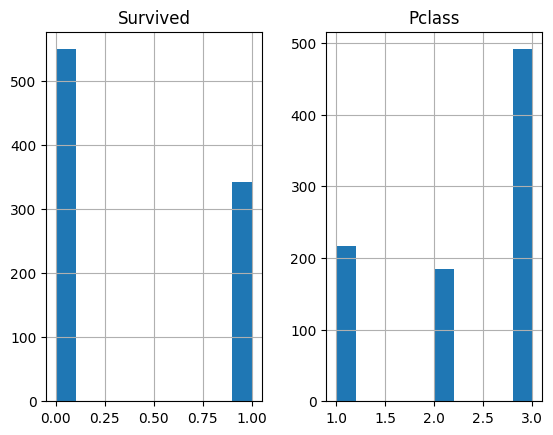

In [49]:
df.hist(["Survived", "Pclass"])


<Axes: xlabel='Embarked'>

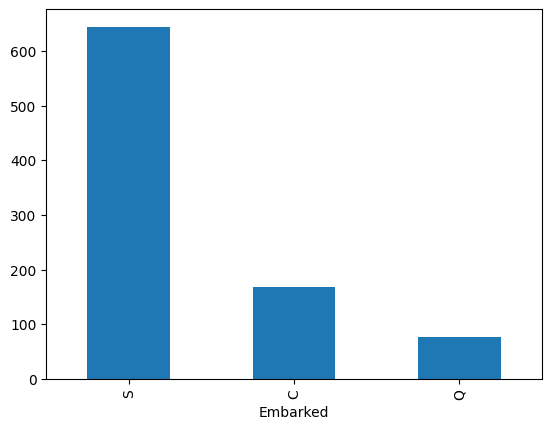

In [50]:
embarked = df.value_counts("Embarked")
#later will be transformed to one-hot
embarked.plot.bar()

In [51]:
# df.dropna()
#df.fillna()

In [229]:
columns_to_normalize=['Age','Fare']
for colname in columns_to_normalize:
    df[colname]=(df[colname]-df[colname].min())/(df[colname].max()-df[colname].min())

In [230]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
2                             Heikkinen, Miss. Laina  female  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                           Allen, Mr. William Henry    male  0.434531      0   

   Parch            Ticket      Fare Cabin Embarked  
0      0         A/5 21171  0.014151   NaN        S  
1      0          PC 17599  0.139136   C85        C  
2      0  STON/O2. 3101282  0.015469   NaN        S  
3      0            113803  0.103644  C123        S  
4      0            373450  0.015713   NaN        S

In [52]:
import pandas as pd
df = pd.read_csv("train.csv")


In [ ]:
# e19191c5.uam.onmicrosoft.com@emea.teams.ms

## lab 5 ml

In [231]:
#data
cols = df.columns
print(cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [232]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import torch.nn.functional as F

In [259]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x))
        
        return x
        

In [235]:
df = df.dropna()
X = df[['Pclass', 'Sex', 'Age','SibSp', 'Fare']]
Y = df[['Survived']]

# X.loc[:,'Age'] = X.loc[:,'Age'].fillna(X['Age'].mean())
X['Sex'].replace(['female', 'male'], [0,1], inplace=True)

X

/tmp/ipykernel_7802/1323642195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'].replace(['female', 'male'], [0,1], inplace=True)


Pclass  Sex       Age  SibSp      Fare
1         1    0  0.472229      1  0.139136
3         1    0  0.434531      1  0.103644
6         1    1  0.673285      0  0.101229
10        3    0  0.044986      1  0.032596
11        1    0  0.723549      0  0.051822
..      ...  ...       ...    ...       ...
871       1    0  0.585323      1  0.102579
872       1    1  0.409399      0  0.009759
879       1    0  0.698417      0  0.162314
887       1    0  0.233476      0  0.058556
889       1    1  0.321438      0  0.058556

[183 rows x 5 columns]

In [236]:
from sklearn.preprocessing import LabelEncoder
Y = np.ravel(Y)
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y)

[1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1]


In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, shuffle=True)

In [260]:
Xt = torch.tensor(X_train.values, dtype = torch.float32)
Yt = torch.tensor(Y_train, dtype=torch.long)
# .reshape(-1,1)
# Yt = Y_train

In [261]:
Yt.shape

torch.Size([137])

In [262]:
model = Model(Xt.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 500

def print_(loss):
    print ("The loss calculated: ", loss)


In [263]:
from torch.utils.data import DataLoader

for epoch in range(1, epochs+1):
    print("Epoch #", epoch)
    y_pred = model(Xt)
#     print(y_pred)
    loss = loss_fn(y_pred, Yt)
    print_(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch # 1
The loss calculated:  0.6927047371864319
Epoch # 2
The loss calculated:  0.6760580539703369
Epoch # 3
The loss calculated:  0.6577760577201843
Epoch # 4
The loss calculated:  0.6410418152809143
Epoch # 5
The loss calculated:  0.6274042725563049
Epoch # 6
The loss calculated:  0.6176177263259888
Epoch # 7
The loss calculated:  0.6114543676376343
Epoch # 8
The loss calculated:  0.6079199314117432
Epoch # 9
The loss calculated:  0.6057404279708862
Epoch # 10
The loss calculated:  0.6039658188819885
Epoch # 11
The loss calculated:  0.6018784046173096
Epoch # 12
The loss calculated:  0.5988859534263611
Epoch # 13
The loss calculated:  0.5944192409515381
Epoch # 14
The loss calculated:  0.58795166015625
Epoch # 15
The loss calculated:  0.5793240666389465
Epoch # 16
The loss calculated:  0.569113552570343
Epoch # 17
The loss calculated:  0.5591343641281128
Epoch # 18
The loss calculated:  0.5525994300842285
Epoch # 19
The loss calculated:  0.549091637134552
Epoch # 20
The loss calcu

/tmp/ipykernel_7802/3372075492.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x))


The loss calculated:  0.4745003283023834
Epoch # 114
The loss calculated:  0.47428470849990845
Epoch # 115
The loss calculated:  0.47402113676071167
Epoch # 116
The loss calculated:  0.4738253355026245
Epoch # 117
The loss calculated:  0.47366538643836975
Epoch # 118
The loss calculated:  0.47345176339149475
Epoch # 119
The loss calculated:  0.47328999638557434
Epoch # 120
The loss calculated:  0.47304701805114746
Epoch # 121
The loss calculated:  0.47283679246902466
Epoch # 122
The loss calculated:  0.47269734740257263
Epoch # 123
The loss calculated:  0.47256502509117126
Epoch # 124
The loss calculated:  0.4723707437515259
Epoch # 125
The loss calculated:  0.4721546471118927
Epoch # 126
The loss calculated:  0.4719236493110657
Epoch # 127
The loss calculated:  0.4718014895915985
Epoch # 128
The loss calculated:  0.4715701937675476
Epoch # 129
The loss calculated:  0.47162505984306335
Epoch # 130
The loss calculated:  0.47140219807624817
Epoch # 131
The loss calculated:  0.47120794653

Epoch # 350
The loss calculated:  0.45442134141921997
Epoch # 351
The loss calculated:  0.4545627236366272
Epoch # 352
The loss calculated:  0.4543512463569641
Epoch # 353
The loss calculated:  0.4541962146759033
Epoch # 354
The loss calculated:  0.4540751874446869
Epoch # 355
The loss calculated:  0.45386749505996704
Epoch # 356
The loss calculated:  0.4536762833595276
Epoch # 357
The loss calculated:  0.4532167911529541
Epoch # 358
The loss calculated:  0.4538520872592926
Epoch # 359
The loss calculated:  0.45413821935653687
Epoch # 360
The loss calculated:  0.45311087369918823
Epoch # 361
The loss calculated:  0.45335227251052856
Epoch # 362
The loss calculated:  0.45350611209869385
Epoch # 363
The loss calculated:  0.45265665650367737
Epoch # 364
The loss calculated:  0.4524100124835968
Epoch # 365
The loss calculated:  0.4523312449455261
Epoch # 366
The loss calculated:  0.4522554874420166
Epoch # 367
The loss calculated:  0.4523703455924988
Epoch # 368
The loss calculated:  0.452

In [264]:
x_test = torch.tensor(X_test.values, dtype=torch.float32)

In [271]:
pred = model(x_test)

/tmp/ipykernel_7802/3372075492.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x))


In [272]:
pred = pred.detach().numpy()
pred

array([[1.3141002e-01, 8.6859006e-01],
       [3.0172759e-16, 1.0000000e+00],
       [5.9731257e-21, 1.0000000e+00],
       [8.7287611e-01, 1.2712391e-01],
       [3.3298880e-01, 6.6701120e-01],
       [9.9992323e-01, 7.6730175e-05],
       [6.9742590e-01, 3.0257410e-01],
       [1.8122771e-10, 1.0000000e+00],
       [8.1137923e-18, 1.0000000e+00],
       [9.9391985e-01, 6.0801902e-03],
       [9.9800962e-01, 1.9904438e-03],
       [1.4347603e-12, 1.0000000e+00],
       [8.8945550e-01, 1.1054446e-01],
       [5.3068206e-19, 1.0000000e+00],
       [4.4245785e-01, 5.5754209e-01],
       [3.9323148e-01, 6.0676849e-01],
       [5.0538932e-23, 1.0000000e+00],
       [6.8482041e-01, 3.1517953e-01],
       [9.9650586e-01, 3.4941665e-03],
       [3.6827392e-24, 1.0000000e+00],
       [3.4629088e-12, 1.0000000e+00],
       [2.4781654e-11, 1.0000000e+00],
       [8.4075117e-01, 1.5924890e-01],
       [9.9999881e-01, 1.2382451e-06],
       [9.9950111e-01, 4.9885432e-04],
       [1.1888127e-14, 1.

In [269]:
print ("The accuracy is", accuracy_score(Y_test, np.argmax(pred, axis=1)))

The accuracy is 0.7391304347826086
